In [1]:
import pandas as pd
cinema_df = pd.read_csv("./data/cinema.csv")
cinema_df.head()

,title,year,cinema_link,stars,wikipediaLink,sale,duration,year,poster,language
0,انتقام برادر,1310,http://www.cinema-theatre.com/performance_5/ف...,عبدالحسین لجستی ، رضا شهابی ، احمد مرادی ، کاظ...,NaN,NaN,NaN,NaN,NaN,NaN
1,حاجی آقا اکتور سینما,1312,http://www.cinema-theatre.com/performance_6/ف...,حبیب اله مراد ، آسیا قسطانیان ، زما آگانیانس ،...,NaN,NaN,NaN,NaN,NaN,NaN
2,دختر لر,1312,http://www.cinema-theatre.com/performance_7/ف...,روح انگیز ، عبدالحسین سپنتا ، هادی ، سهراب پوری|,NaN,NaN,NaN,NaN,NaN,NaN
3,بوالهوس,1313,http://www.cinema-theatre.com/performance_8/ف...,محمدعلی قطبی ، احمد دهقان ، احمد گرجی ، احمد م...,NaN,NaN,NaN,NaN,NaN,NaN
4,شیرین و فرهاد,1313,http://www.cinema-theatre.com/performance_9/ف...,فخرالزمان جبار وزیری ، عبدالحسین سپنتا ، ایران...,https://fa.wikipedia.org//wiki/%D8%B4%DB%8C%D...,,90,1349,https://upload.wikimedia.org/wikipedia/fa/thu...,fa


In [2]:
# convert duration to proper integer number
def converter(duration:str):
    try:
       converted= int(duration)
       return converted
    except Exception:
       return 0

<AxesSubplot:ylabel='Count'>

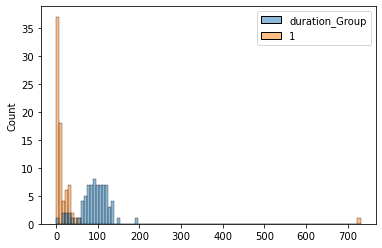

In [3]:
import seaborn as sns

# ! normalize Name of Columns
cinema_df.columns=[ column.strip() for column in cinema_df.columns]

cinema_df.dropna(subset=['duration'],inplace=True)

cinema_df['duration_Group']=cinema_df['duration'].apply(lambda x : converter(x))

# cinema_df['duration_Group']=cinema_df['duration'].apply(lambda x : '90+' if x > 90 else '45-' if x<45  else '45_90' )
# cinema_df.groupby(['duration_Group'])['title'].count()
x=cinema_df.groupby(['duration_Group'])['duration'].count().index # Move Durations
y=cinema_df.groupby(['duration_Group'])['title'].count().values # Count of move duration

# sns.histplot(data=cinema_df.groupby(['duration_Group'])['duration'].count(),bins=100)
sns.histplot(data=[x,y],bins=100)

In [4]:
def find_star(dic_stars_and_count:dict,stars:str):
    if type(stars)==str:
        for star in stars.split('،'):
            if star in dic_stars_and_count.keys():
                dic_stars_and_count[star]=dic_stars_and_count[star]+1
            else:
                dic_stars_and_count[star]=1

In [5]:
dict_for_stars=dict()
cinema_df['stars']
cinema_df['stars'].apply(lambda x :find_star(dict_for_stars,x))
dict_for_stars
sorted_dict ={k:v for k,v in sorted(dict_for_stars.items(),key=lambda item:item[1],reverse=True)}
sorted_dict

{' حمیده خیرآبادی ': 85,
 ' محسن آراسته ': 75,
 ' علی میری ': 75,
 ' احمد قدکچیان ': 65,
 'رضا بیک ایمانوردی ': 62,
 ' محمدتقی کهنمویی ': 62,
 ' منصور سپهرنیا ': 55,
 ' تقی ظهوری ': 51,
 'ناصر ملک مطیعی ': 50,
 ' نعمت اله گرجی ': 49,
 ' حسین شهاب ': 49,
 ' حسن رضایی ': 48,
 ' گیتی فروهر ': 47,
 ' مهری ودادیان ': 47,
 ' اکبر جنتی شیرازی ': 45,
 ' همایون ': 44,
 ' علی آزاد ': 42,
 ' داریوش اسدزاده ': 41,
 ' یدی ': 40,
 'منوچهر وثوق ': 39,
 ' ذبیح اله ذبیح پور ': 38,
 ' اکبر هاشمی ': 37,
 ' جهانگیر فروهر ': 36,
 ' جمشید مهرداد ': 35,
 ' نرسی کرکیا ': 35,
 ' جلال پیشواییان ': 35,
 ' اکبر خواجوی ': 34,
 ' پرخیده ': 34,
 ' غلامحسین بهمنیار ': 34,
 'محمدعلی فردین ': 34,
 ' پوری بنایی ': 34,
 ' سهیلا ': 33,
 ' پروین سلیمانی ': 33,
 ' یداله شیراندامی ': 33,
 ' عنایت بخشی ': 33,
 ' عباس مختاری ': 33,
 ' گرشا رئوفی ': 32,
 ' ملیحه نصیری ': 32,
 ' ایران قادری ': 32,
 ' علی دهقان ': 32,
 ' جواد تقدسی ': 31,
 ' شهین ': 31,
 ' اسداله یکتا ': 31,
 ' علی زندی ': 30,
 ' هوشنگ بهشتی ': 30,
 ' فرنگیس فروه